## REAL ESTATE -PRICE PREDICTOR

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data1.csv")

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LASTAT   506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E141E50148>,
      dtype=object)

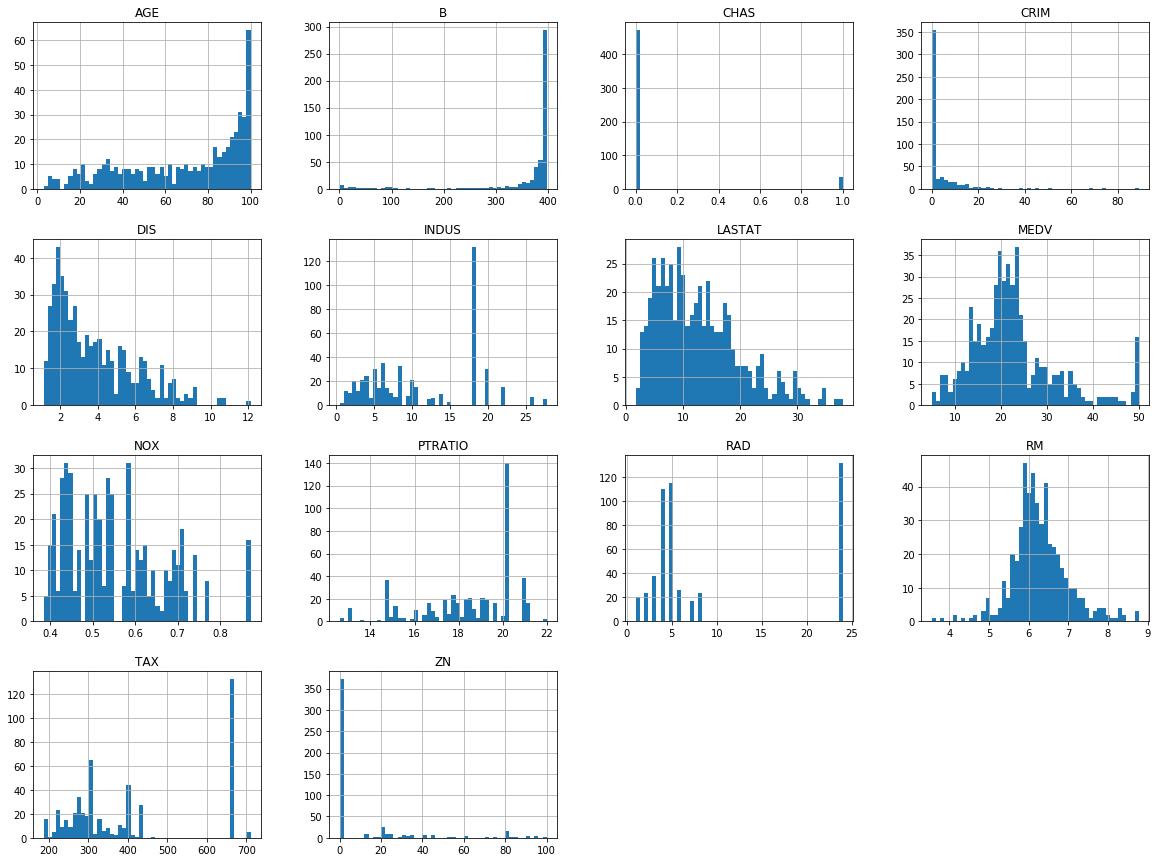

In [4]:
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))

## Train-Test Splitting


In [5]:
# import numpy as np
# for learning purpose

# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     test_set_size= int(len(data)*test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [6]:
# train_set,test_set=split_train_test(housing,0.2)

In [7]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows of train set {len(train_set)}\nRows of test set {len(test_set)}")

Rows of train set 404
Rows of test set 102


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    

In [9]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [10]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [11]:
housing=strat_train_set.copy()

## Looking for correlation

In [12]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.676004
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LASTAT    -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E14579C148>,
      dtype=object)

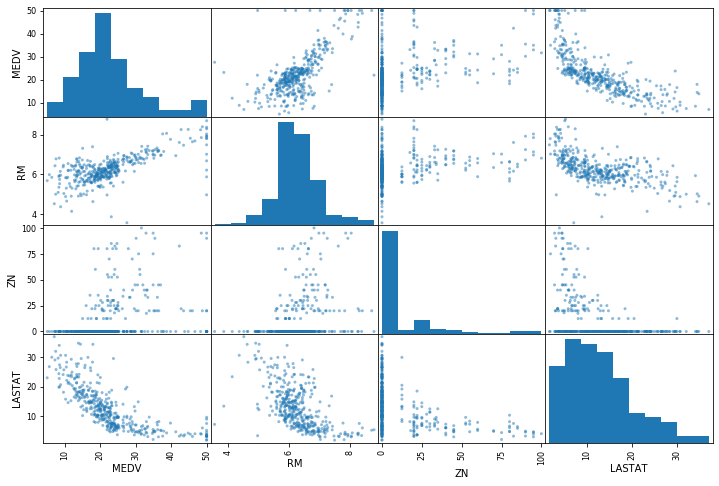

In [13]:
from pandas.plotting import scatter_matrix
attributs=["MEDV","RM","ZN","LASTAT"]
scatter_matrix(housing[attributs], figsize=(12,8))

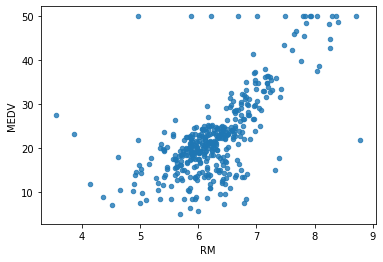

In [14]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

## Trying out attribute combination

In [15]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]
print(housing["TAXRM"])

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98            NaN
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64


In [16]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.676004
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.524408
LASTAT    -0.740494
Name: MEDV, dtype: float64

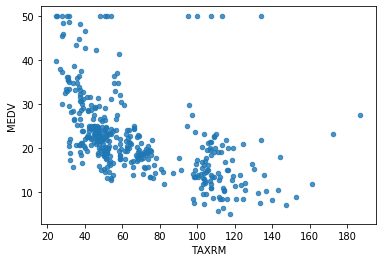

In [17]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [18]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

## missing attributs

In [19]:
# to take care of missing attributes
# 1.get rid of missing data points
# 2.get rid of whole attributes
# 3.set thee value to some value (0,mean or median)

In [20]:
a=housing.dropna(subset=["RM"]) #option 1
a.shape

(401, 13)

In [21]:
housing.drop("RM",axis=1).shape#option 2
#note that there is not RM column but also there is no change in original dataframe

(404, 12)

In [22]:
median=housing["RM"].median()#option 3

In [23]:
housing["RM"].fillna(median)#compute median for option 3

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     6.209
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [24]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [25]:
imputer.statistics_.shape

(13,)

In [26]:
X=imputer.transform(housing)

In [27]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [28]:
 housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LASTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.275775,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.708724,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

In [29]:
# primarily three types of objects
# 1.Estimators-It estimates some parameter based on as dataset eg.imputer
# it has fit and transform method
# fit method=fits the dataset and calculate internal parameters
# 2.transformer-takes input and return output based on thee learnong from fit().it also a convenience function called fit tranform()
# which fits and then transform
# 3.predictors-linearregression model

## feature scaling

In [30]:
# two type of feature scaling methods:
# 1.min-max scaling (normalization)
# (value-min)/(max-min)
# sklearn provides a aclass called min max sacaler for this 
# 2.standardiztion
# (value-min)/std

## Creating pipeline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler',StandardScaler()),])

In [32]:
housing_num_tr=my_pipeline.fit_transform(housing_tr)

In [33]:
  housing_num_tr.shape

(404, 13)

## selecting a desired model 

In [34]:
from sklearn.linear_model import LinearRegression
# model=LinearRegression()
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
# model=DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
some_data=housing.iloc[:5]

In [36]:
some_labels=housing_labels.iloc[:5]

In [37]:
prepared_data=my_pipeline.transform(some_data)

In [38]:
model.predict(prepared_data)

array([22.16 , 25.35 , 16.869, 23.305, 23.52 ])

In [39]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [41]:
mse

1.626754299504948

## cross validation

In [42]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [43]:
rmse_scores

array([2.81437479, 2.75870399, 4.80834692, 2.57968361, 3.24973391,
       2.69043374, 4.39923949, 3.56006766, 3.0085905 , 4.13084513])

In [44]:
def print_scores(scores):
    print("scores",scores)
    print("mean",scores.mean())
    print("standard deviation",scores.std())

In [45]:
print(print_scores(rmse_scores))

scores [2.81437479 2.75870399 4.80834692 2.57968361 3.24973391 2.69043374
 4.39923949 3.56006766 3.0085905  4.13084513]
mean 3.4000019744222905
standard deviation 0.7515370163287542
None


## saving the model

In [46]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## testing data

In [48]:
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_pred=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_pred)
final_rmse=np.sqrt(final_mse)

In [51]:
print(final_pred,list(y_test))

[24.34  11.706 25.851 21.185 18.667 14.959 20.21  14.558 32.04  42.688
 19.379 11.449 24.794 24.649 19.598 10.921 31.472 14.705 23.424 18.779
 20.208 17.956 18.254 21.824 18.317 32.096 16.314 33.556  8.568 33.312
 24.885 21.015 23.029 11.049 20.607 11.161 44.049 24.575 23.479 42.217
 24.113 29.026 20.206 20.646 18.679 33.666 44.743 20.023 20.153 22.06
 21.632 14.924 21.644 14.887 24.695 33.682 42.655 29.359 19.112 20.797
 46.614  9.296 18.747 25.388 14.596 32.666 19.746 17.861 19.157 33.925
 26.153 22.888 21.781 22.395 34.266 11.925 15.323 20.078 20.596 21.229
 22.475 20.966 14.363 23.095 21.334 21.47  13.74  21.042 21.822 23.269
 18.425 26.729  7.291 26.048 19.172 29.611 19.596 31.19  15.102 26.76
 21.17  20.771] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 